In [1]:
#
# libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
#

In [2]:
#
# make a pandas Timestamp for 12/25/2020
#
my_timestamp = pd.Timestamp('12-25-2020')
my_timestamp

Timestamp('2020-12-25 00:00:00')

In [3]:
#
# make a datetime object for 12/25/2020
#
from datetime import datetime
my_datetime = datetime.strptime('12-25-2020','%m-%d-%Y')
my_datetime

datetime.datetime(2020, 12, 25, 0, 0)

In [4]:
#
# compare the methods for the two objects
#
timestamp_methods = \
    pd.DataFrame({'TS' : [i for i in dir(my_timestamp) 
                          if not i.startswith("_")]})
#
datetime_methods = \
    pd.DataFrame({'DT' : [i for i in dir(my_datetime) 
                          if not i.startswith("_")]})
#
methods = \
    pd.merge(timestamp_methods, datetime_methods, 
             left_on = ['TS'], right_on = ['DT'],
             how = 'outer').fillna("-")
#
for i in range(3):
    print(methods.loc[(i * (methods.shape[0] / 3)):
                      ((i + 1) * (methods.shape[0] / 3)) - 1], '\n')

               TS             DT
0            asm8              -
1      astimezone     astimezone
2            ceil              -
3         combine        combine
4           ctime          ctime
5            date           date
6             day            day
7        day_name              -
8     day_of_week              -
9     day_of_year              -
10      dayofweek              -
11      dayofyear              -
12  days_in_month              -
13    daysinmonth              -
14            dst            dst
15          floor              -
16           fold           fold
17           freq              -
18        freqstr              -
19  fromisoformat  fromisoformat
20    fromordinal    fromordinal
21  fromtimestamp  fromtimestamp
22           hour           hour
23   is_leap_year              - 

                  TS           DT
25    is_month_start            -
26    is_quarter_end            -
27  is_quarter_start            -
28       is_year_end            -
29 

In [5]:
my_time = pd.Timestamp('2020-12-25 15:05:09.001234987')
print(my_time.hour - 12, ('AM' if my_time.hour < 12 else 'PM'),
      my_time.minute, 'minutes',
      my_time.second, 'seconds', 
      my_time.microsecond, 'microseconds', 
      my_time.nanosecond, 'nanoseconds')

3 PM 5 minutes 9 seconds 1234 microseconds 987 nanoseconds


In [6]:
#
# create a date as a string, then convert to Timestamp
#
string_date = '2020-07-31 13:51'
TS_date = pd.to_datetime(string_date)
TS_date

Timestamp('2020-07-31 13:51:00')

In [7]:
#
# create a time series
#
dates = pd.date_range(start = '2012-01-01', 
                      end = '2019-12-31',
                      freq = 'W-MON')
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
print(dates)

DatetimeIndex(['2012-01-02', '2012-01-09', '2012-01-16', '2012-01-23',
               '2012-01-30', '2012-02-06', '2012-02-13', '2012-02-20',
               '2012-02-27', '2012-03-05',
               ...
               '2019-10-28', '2019-11-04', '2019-11-11', '2019-11-18',
               '2019-11-25', '2019-12-02', '2019-12-09', '2019-12-16',
               '2019-12-23', '2019-12-30'],
              dtype='datetime64[ns]', length=418, freq='W-MON')


In [9]:
#
# inspect the type if we subtract two of the dates
#
type(dates[1] - dates[0])

pandas._libs.tslibs.timedeltas.Timedelta

In [10]:
values = pd.Series([(dates[i] - dates[0]).total_seconds() 
                    for i in range(len(dates))]) / 60 / 60 # convert to hours
values = 1037.65 + values**1.5 / 1000

In [11]:
time_series = pd.DataFrame({'date' : dates,
                           'value' : values})
time_series.head()

,date,value
0,2012-01-02,1037.650000
1,2012-01-09,1039.827529
2,2012-01-16,1043.808982
3,2012-01-23,1048.964772
4,2012-01-30,1055.070231


In [12]:
time_series['int_date'] = (dates.astype(int)/1e9/60/60/24 - 
                           dates.astype(int)[0]/1e9/60/60/24)
time_series

,date,value,int_date
0,2012-01-02,1037.650000,0.0
1,2012-01-09,1039.827529,7.0
2,2012-01-16,1043.808982,14.0
3,2012-01-23,1048.964772,21.0
4,2012-01-30,1055.070231,28.0
...,...,...,...
413,2019-12-02,19313.980376,2891.0
414,2019-12-09,19380.399465,2898.0
415,2019-12-16,19446.898818,2905.0
416,2019-12-23,19513.478340,2912.0


In [13]:
#
# other methods to generate date series
#
time_periods = \
    pd.period_range('2020-01-01', periods = 13, freq = 'W-MON')
time_periods

PeriodIndex(['2019-12-31/2020-01-06', '2020-01-07/2020-01-13',
             '2020-01-14/2020-01-20', '2020-01-21/2020-01-27',
             '2020-01-28/2020-02-03', '2020-02-04/2020-02-10',
             '2020-02-11/2020-02-17', '2020-02-18/2020-02-24',
             '2020-02-25/2020-03-02', '2020-03-03/2020-03-09',
             '2020-03-10/2020-03-16', '2020-03-17/2020-03-23',
             '2020-03-24/2020-03-30'],
            dtype='period[W-MON]', freq='W-MON')

In [14]:
print(time_periods.start_time, '\n', time_periods.end_time)

DatetimeIndex(['2019-12-31', '2020-01-07', '2020-01-14', '2020-01-21',
               '2020-01-28', '2020-02-04', '2020-02-11', '2020-02-18',
               '2020-02-25', '2020-03-03', '2020-03-10', '2020-03-17',
               '2020-03-24'],
              dtype='datetime64[ns]', freq='W-TUE') 
 DatetimeIndex(['2020-01-06 23:59:59.999999999',
               '2020-01-13 23:59:59.999999999',
               '2020-01-20 23:59:59.999999999',
               '2020-01-27 23:59:59.999999999',
               '2020-02-03 23:59:59.999999999',
               '2020-02-10 23:59:59.999999999',
               '2020-02-17 23:59:59.999999999',
               '2020-02-24 23:59:59.999999999',
               '2020-03-02 23:59:59.999999999',
               '2020-03-09 23:59:59.999999999',
               '2020-03-16 23:59:59.999999999',
               '2020-03-23 23:59:59.999999999',
               '2020-03-30 23:59:59.999999999'],
              dtype='datetime64[ns]', freq=None)


In [15]:
time_periods + 2

PeriodIndex(['2020-01-14/2020-01-20', '2020-01-21/2020-01-27',
             '2020-01-28/2020-02-03', '2020-02-04/2020-02-10',
             '2020-02-11/2020-02-17', '2020-02-18/2020-02-24',
             '2020-02-25/2020-03-02', '2020-03-03/2020-03-09',
             '2020-03-10/2020-03-16', '2020-03-17/2020-03-23',
             '2020-03-24/2020-03-30', '2020-03-31/2020-04-06',
             '2020-04-07/2020-04-13'],
            dtype='period[W-MON]', freq='W-MON')

In [16]:
#
# apply methods to the datetimes
#
print(dates.daysinmonth.unique())
#

Int64Index([31, 29, 30, 28], dtype='int64')


In [17]:
print(dates[dates.is_quarter_end])

DatetimeIndex(['2012-12-31', '2013-09-30', '2014-03-31', '2014-06-30',
               '2018-12-31', '2019-09-30'],
              dtype='datetime64[ns]', freq=None)


In [18]:
print(dates.isocalendar().week)

2012-01-02     1
2012-01-09     2
2012-01-16     3
2012-01-23     4
2012-01-30     5
              ..
2019-12-02    49
2019-12-09    50
2019-12-16    51
2019-12-23    52
2019-12-30     1
Freq: W-MON, Name: week, Length: 418, dtype: UInt32


In [19]:
print(dates[33], dates[0])

2012-08-20 00:00:00 2012-01-02 00:00:00


In [20]:
#
# look at timedelta methods
#
time_diff = (dates[33] - dates[0])
print(type(time_diff))

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [21]:
print(time_diff.seconds)

0


In [22]:
print(time_diff, " equals ", time_diff.value, "nanoseconds")

231 days 00:00:00  equals  19958400000000000 nanoseconds


In [23]:
print(time_diff.total_seconds())

19958400.0


In [24]:
#
# look at the result of the format argument
#
datetime.strptime('09-30-2020','%m-%d-%Y')

datetime.datetime(2020, 9, 30, 0, 0)

In [25]:
#
# create Timestamps for 12/20/2020 1:57 PM using different formats
#
num_date = pd.to_datetime('12-20-2020 13:57:03.13', 
                          format = "%m-%d-%Y %H:%M:%S.%f")
print(num_date)

2020-12-20 13:57:03.130000


In [26]:
text_date = pd.to_datetime('December 20, 2020 1:57:03 PM', 
                           format = '%B %d, %Y %I:%M:%S %p')
print(text_date)
print(text_date.strftime(format = '%B %d, %Y %I:%M:%S %p'))

2020-12-20 13:57:03
December 20, 2020 01:57:03 PM


In [27]:
#
# localize text_date to US Mountain time zone
# then print it in Asia Tokyo time zone
#
text_date = text_date.tz_localize('US/Mountain')
print(text_date)
print(text_date.tz_convert('Asia/Tokyo').
      strftime(format = '%B %d, %Y %I:%M:%S %p'))

2020-12-20 13:57:03-07:00
December 21, 2020 05:57:03 AM


In [28]:
#
# explore the limits on Timestamps
#
print(pd.Timestamp.min)
print(pd.Timestamp.max)

1677-09-21 00:12:43.145225
2262-04-11 23:47:16.854775807


In [29]:
import arrow
print(arrow.get('1970-01-01 00:00:00'))
print(arrow.get('1970-01-01 00:00:07').int_timestamp)
print(arrow.get('2475-03-07 07:11:23').int_timestamp)

1970-01-01T00:00:00+00:00
7
15941949083


In [30]:
#
# construct synthetic data as a sin function with period 180 days
#
x_values = pd.Series(range(1, 548))
period = 180
sin_series = np.sin(2 * np.pi * x_values / period) * 5
noise = 65 + np.random.normal(0, 3, 547)
temperatures = sin_series + noise

<AxesSubplot:>

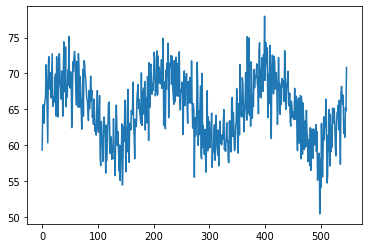

In [31]:
#
# simple plot
#
temperatures.plot()

<AxesSubplot:xlabel='date'>

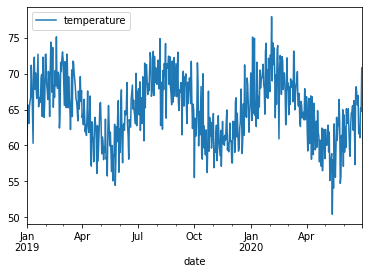

In [32]:
dates = pd.date_range('2019-01-01', '2020-06-30')
temp_data = pd.DataFrame({'date' : dates, 
                         'temperature' : temperatures})
temp_data.plot(x = 'date', 
               y = 'temperature')

In [33]:
_ = [print(temp_data['date'][i]) for i in range(3)]

2019-01-01 00:00:00
2019-01-02 00:00:00
2019-01-03 00:00:00


In [34]:
offset = pd.Timedelta(11.5, unit = 'h')
temp_data['date'] = temp_data['date'] + offset
_ = [print(temp_data['date'][i]) for i in range(3)]

2019-01-01 11:30:00
2019-01-02 11:30:00
2019-01-03 11:30:00


In [35]:
time_difference = (pd.to_datetime('2019-01-11') - 
                   pd.to_datetime('2019-01-04'))
print(time_difference.days)
print(time_difference.seconds)

7
0


In [36]:
time_difference = (pd.to_datetime('2019-01-11 13:57:03') - 
                   pd.to_datetime('2019-01-04 14:31:47'))
print(time_difference.days)
print(time_difference.seconds)

6
84316


In [37]:
first_quarter = pd.date_range('2021-01-01 00:00:00', 
                              periods = 13 * 7, freq = '1d')
first_quarter

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [38]:
first_quarter_bus = pd.date_range('2021-01-01 00:00:00', 
                              periods = 13 * 5, freq = 'B')
first_quarter_bus

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
               '2021-02-26', '2021-03-01', '2021-03-02', '2021-03-03',
               '2021-03-04', '2021-03-05', '2021-03-08', '2021-03-09',
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-15',
               '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19',
      

In [39]:
offset = pd.tseries.offsets.BusinessDay(13 * 5)
second_quarter_bus = first_quarter_bus + offset
second_quarter_bus

DatetimeIndex(['2021-04-02', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09', '2021-04-12', '2021-04-13',
               '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-19',
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07', '2021-05-10', '2021-05-11',
               '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-17',
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27',
               '2021-05-28', '2021-05-31', '2021-06-01', '2021-06-02',
               '2021-06-03', '2021-06-04', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-14',
               '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18',
      

In [40]:
from pandas.tseries.offsets import *

In [41]:
(second_quarter_bus + MonthEnd(0)).unique()

DatetimeIndex(['2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31'], dtype='datetime64[ns]', freq=None)

In [42]:
(second_quarter_bus + MonthEnd(3)).unique()

DatetimeIndex(['2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30'], dtype='datetime64[ns]', freq=None)